# Online Chess Data Analysis and Winner Prediction Model

#### Data for 20,000+ chess games played on Lichess, including moves, victory, rating, opening details and more.

|No.|Feature|Details|
|-|:-|:-|
|1.|game_id|Number of games taken in the data set|
|2.|rated|whether the game is rated or not|
|3.|turns|number of moves played by the winner|
|4.|victory_status|whether the game was won by placing a checkmate or due to running out of time, or when one of the player withdrawn due to some other reasons or whether the game ended in a draw|
|5.|winner|The color of the coins chosen by the person who won the game (Target column)|
|6.|time_increment|extra time obtained in the game|
|7.|white_id|The name of player with white move|
|8.|white_rating|Shows whether the player who has chosen white is a beginner, average player, master etc .eg: rating between 1200-1399 shows that the player is a beginner, 1400-1599 : average player, 2200-2399:Master etc|
|9.|black_id|The name of player with black move|
|10.|black_rating|Decides the level of the player who choose black coins|
|11.|moves|Moves & counter moves opted by the players|
|12.|opening_code|It provides the most common system for categorizing all chess openings.Despite having only 500 codes (from A00-E99), the system does a good job of segmenting openings. These codes help to organize chess games and openings, especially in game databases|
|13.|Opening_moves|Number of moves in the opening phase of the game where you decide how to develop your pieces and place your pawns. It usually lasts in 8-12 moves.The first moves of a chess game are termed the "opening" or "opening moves". A good opening will provide better protection of the King, control over an area of the board (particularly the center), greater mobility for pieces, and possibly opportunities to capture opposing pawns and pieces|
|14.|Opening_fullname|Chess openings are named after some place/city where it was played first or named after a person who first played it or sometimes even named after some animals and even some weird names which don’t make any sense, are given for some openings|
|15.|Opening_shortname|The short name of the opening full name|
|16.|Opening_response|counter move given by the player with respect to the opening moves|
|17.|Opening_variation|Used to describe a branch of another named opening, for example the Najdorf Variation, a line of the Sicilian Defense|

## Importing Online-Chess Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt = pd.read_csv('chess_games.csv',index_col=0)
dt.head(2)

,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
game_id,,,,,,,,,,,,,,,,
1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation


In [3]:
dt.shape

(20058, 16)

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20058 entries, 1 to 20058
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              20058 non-null  bool  
 1   turns              20058 non-null  int64 
 2   victory_status     20058 non-null  object
 3   winner             20058 non-null  object
 4   time_increment     20058 non-null  object
 5   white_id           20058 non-null  object
 6   white_rating       20058 non-null  int64 
 7   black_id           20058 non-null  object
 8   black_rating       20058 non-null  int64 
 9   moves              20058 non-null  object
 10  opening_code       20058 non-null  object
 11  opening_moves      20058 non-null  int64 
 12  opening_fullname   20058 non-null  object
 13  opening_shortname  20058 non-null  object
 14  opening_response   1207 non-null   object
 15  opening_variation  14398 non-null  object
dtypes: bool(1), int64(4), object(11)
memory 

### Data Description:

* Dataset is about the online-chess game and its details
* Data of 20,058 online-chess games with 17 features
* 2 features have null values
* Contains 3 types of data: Boolean, Object and int

In [5]:
dt.describe()

,turns,white_rating,black_rating,opening_moves
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981
std,33.570585,291.253376,291.036126,2.797152
min,1.000000,784.000000,789.000000,1.000000
25%,37.000000,1398.000000,1391.000000,3.000000
50%,55.000000,1567.000000,1562.000000,4.000000
75%,79.000000,1793.000000,1784.000000,6.000000
max,349.000000,2700.000000,2723.000000,28.000000


In [6]:
dt.describe(include='object')

,victory_status,winner,time_increment,white_id,black_id,moves,opening_code,opening_fullname,opening_shortname,opening_response,opening_variation
count,20058,20058,20058,20058,20058,20058,20058,20058,20058,1207,14398
unique,4,3,400,9438,9331,18920,365,1477,128,3,615
top,Resign,White,10+0,taranga,taranga,e4 e5,A00,Van't Kruijs Opening,Sicilian Defense,Declined,#2
freq,11147,10001,7721,72,82,27,1007,368,2632,503,797


##  Preprocessing

### 1.Checking and Handling of missing values

In [7]:
dt.isnull().sum()

rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

#### Findings:

* We can see last two columns have null values
* Both of them are objective type
* Feature 'opening_response' has more tha 70% of missing values so its dropped.
* 'opening_variation' is filled with mode

In [8]:
dt=dt.drop(['opening_response'],axis=1)
dt['opening_variation'].fillna(dt['opening_variation'].mode()[0],inplace=True)

In [9]:
dt.shape

(20058, 15)

In [10]:
dt.isnull().sum()

rated                0
turns                0
victory_status       0
winner               0
time_increment       0
white_id             0
white_rating         0
black_id             0
black_rating         0
moves                0
opening_code         0
opening_moves        0
opening_fullname     0
opening_shortname    0
opening_variation    0
dtype: int64

### 2.Handling for outliers

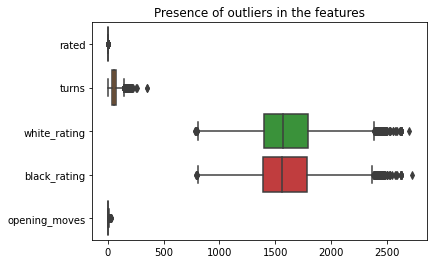

In [11]:
sns.boxplot(data=dt,orient='h')
plt.title('Presence of outliers in the features')
plt.show()

In [12]:
dt['rated'].value_counts()

True     16155
False     3903
Name: rated, dtype: int64

**Rated columns contain only true & false readings. i.e; it doesnt contain any valid outliers**

### Removing outliers in the feature 'Turns','white_rating','black_rating' and 'opening_moves'

In [13]:
out=['turns','white_rating','black_rating','opening_moves']
ind1,ind2,i1,i2=[],[],[],[]

for i in out:
    print('Handling outliers in',i.upper(),'COLUMN: \n')
    Q1 = np.percentile(dt[i],25,interpolation='midpoint')
    Q2 = np.percentile(dt[i],50,interpolation='midpoint')
    Q3 = np.percentile(dt[i],75,interpolation='midpoint')
    IQR = Q3 - Q1
    low_limit = Q1 - IQR*1.5
    up_limit = Q3 + IQR*1.5
    
    print('The values below',low_limit,'and above',up_limit,'are outliers.')
    
    outlier = []
    for x in dt[i]:
        if((x > up_limit) or (x < low_limit)):
            outlier.append(x)
    
    print('There are',len(outlier),'outliers in',i,'column.')
    
    ind1,ind2=dt[i]>up_limit, dt[i]
    i1=dt.loc[ind1].index
    
    dt.drop(i1,inplace=True)
    
    print('Shape of dataset after removal of outliers in',i.upper(),'column:',dt.shape,'\n\n')

Handling outliers in TURNS COLUMN: 

The values below -26.0 and above 142.0 are outliers.
There are 428 outliers in turns column.
Shape of dataset after removal of outliers in TURNS column: (19630, 15) 


Handling outliers in WHITE_RATING COLUMN: 

The values below 804.0 and above 2380.0 are outliers.
There are 131 outliers in white_rating column.
Shape of dataset after removal of outliers in WHITE_RATING column: (19506, 15) 


Handling outliers in BLACK_RATING COLUMN: 

The values below 803.0 and above 2363.0 are outliers.
There are 87 outliers in black_rating column.
Shape of dataset after removal of outliers in BLACK_RATING column: (19425, 15) 


Handling outliers in OPENING_MOVES COLUMN: 

The values below -1.5 and above 10.5 are outliers.
There are 844 outliers in opening_moves column.
Shape of dataset after removal of outliers in OPENING_MOVES column: (18581, 15) 




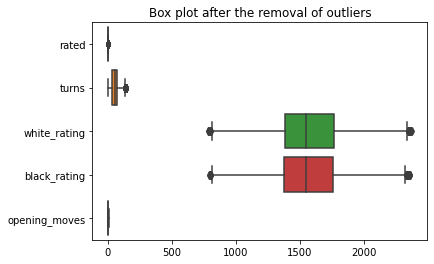

In [14]:
sns.boxplot(data=dt,orient='h')
plt.title('Box plot after the removal of outliers')
plt.show()

### 3.Standard scaling on features

In [15]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
s=dt[['turns','white_rating','black_rating','opening_moves']]
s=standardisation.fit_transform(s)

In [16]:
s=pd.DataFrame(s)
s.columns=['turns','white_rating','black_rating','opening_moves']
s.describe().round(2)

,turns,white_rating,black_rating,opening_moves
count,18581.00,18581.00,18581.00,18581.00
mean,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.89,-2.85,-2.78,-1.55
25%,-0.73,-0.69,-0.68,-0.65
50%,-0.13,-0.09,-0.09,-0.20
75%,0.60,0.68,0.66,0.71
max,2.78,2.87,2.81,2.51


# Exploratory Data Analysis (EDA)

In [17]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [18]:
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


In [19]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


### 1. What percentage of games were won by White ? How many ended in draw ?

In [20]:
winners=pd.DataFrame(dt['winner'].value_counts().reset_index().rename(columns={'index':'Winner','winner':'Count'}))
winners

,Winner,Count
0,White,9318
1,Black,8479
2,Draw,784


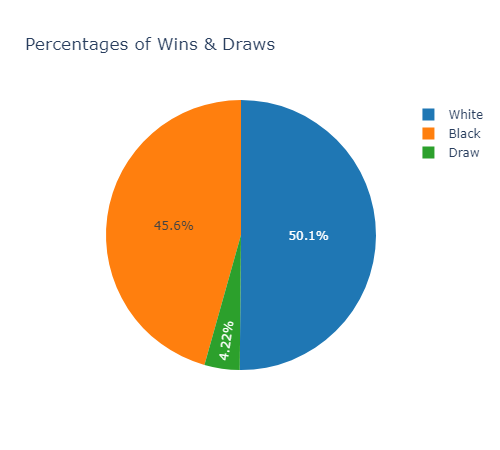

In [21]:
fig=px.pie(winners,
      title='Percentages of Wins & Draws',names='Winner',values='Count',
      color_discrete_sequence=px.colors.qualitative.D3,
      height=450,
      width=500)
fig.show('png')

**Insight**:

* With this pie chart, we can see that almost half (50.1%) of all games were won with the white pieces, 45.6% by black, and 4.22% games ended in a draw.

### 2. Proportion of winners accoding to piece colour of winner and victory_status

In [22]:
winner_status=(pd.DataFrame(dt[['winner','victory_status']].value_counts()).reset_index().rename(columns={'Count':'winner',0:'count'}))
winner_status=winner_status[~(winner_status['winner']=='Draw')]
winner_status

,winner,victory_status,count
0,White,Resign,5459
1,Black,Resign,4938
2,White,Mate,3124
3,Black,Mate,2796
5,Black,Out of Time,745
6,White,Out of Time,735


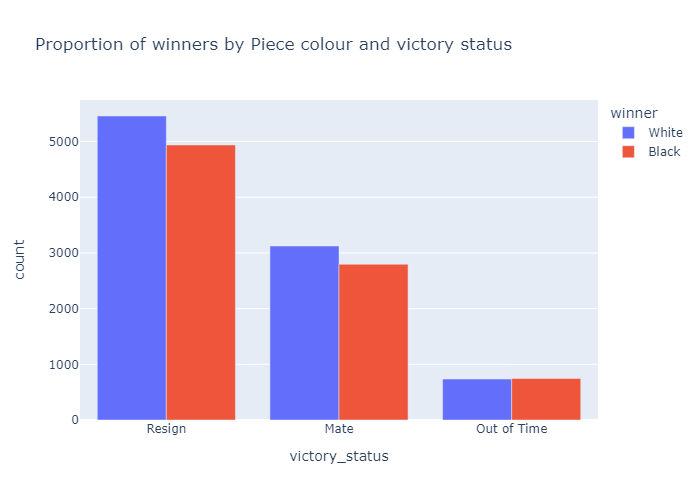

In [23]:
fig=px.bar(winner_status,
      title='Proportion of winners by Piece colour and victory status',
      x='victory_status',
      y='count',
      color='winner',
      barmode='group',
      height=500,
      width=700)
fig.show('png')

**Insights:**

* Majority are won when their mates resign from the game
* Only 32% won by giving a checkmate
* Very feeble are won by time limits
* Except for out of time victory status, "white" have victory in all other status

### 3.How many times the winner was the one that has higher rate?

In [24]:
rate_win=dt[["winner","white_rating","black_rating"]]
rate_win.head()

,winner,white_rating,black_rating
game_id,,,
1,White,1500,1191
2,Black,1322,1261
3,White,1496,1500
4,White,1439,1454
5,White,1523,1469


In [25]:
rate_win["w_r>b_r"]=(rate_win["white_rating"] > rate_win["black_rating"])
rate_win.head()

,winner,white_rating,black_rating,w_r>b_r
game_id,,,,
1,White,1500,1191,True
2,Black,1322,1261,True
3,White,1496,1500,False
4,White,1439,1454,False
5,White,1523,1469,True


In [26]:
win_rate_stat=((rate_win["winner"]=="White")&(rate_win["w_r>b_r"]==True)) | ((rate_win["winner"]=="Black")&(rate_win["w_r>b_r"]==False))
rate_win["win_rate_status"]="low_rank win"
rate_win.loc[win_rate_stat,"win_rate_status"]="high_rank win"
rate_win

,winner,white_rating,black_rating,w_r>b_r,win_rate_status
game_id,,,,,
1,White,1500,1191,True,high_rank win
2,Black,1322,1261,True,low_rank win
3,White,1496,1500,False,low_rank win
4,White,1439,1454,False,low_rank win
5,White,1523,1469,True,high_rank win
...,...,...,...,...,...
20054,White,1691,1220,True,high_rank win
20055,Black,1233,1196,True,low_rank win
20056,White,1219,1286,False,low_rank win


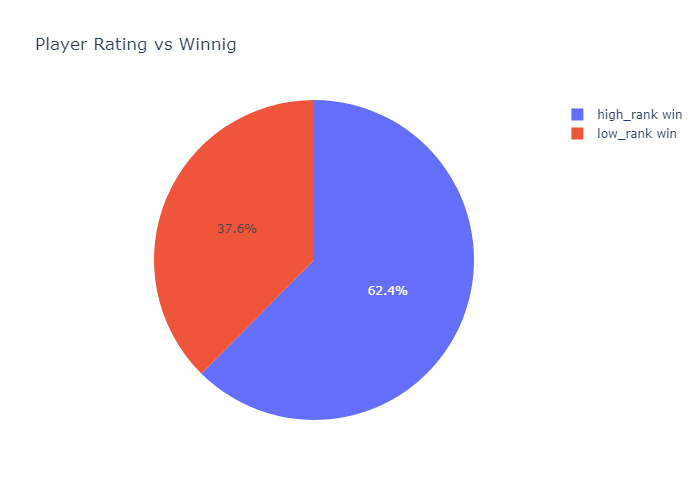

In [27]:
fig=px.pie(rate_win["win_rate_status"].value_counts(),
           names=rate_win["win_rate_status"].value_counts().index,values=rate_win["win_rate_status"].value_counts().values,
           title="Player Rating vs Winnig",
           labels={"names":"Situation ","values":"Count "})
fig.show('png')

**Insights:**

* 62.4% of the games are won by person with high rating

### 4.The most significant opening technique

In [28]:
opening=dt["opening_shortname"].value_counts().nlargest(5)
opening

Sicilian Defense     2236
French Defense       1305
Queen's Pawn Game    1196
King's Pawn Game      896
Queen's Gambit        827
Name: opening_shortname, dtype: int64

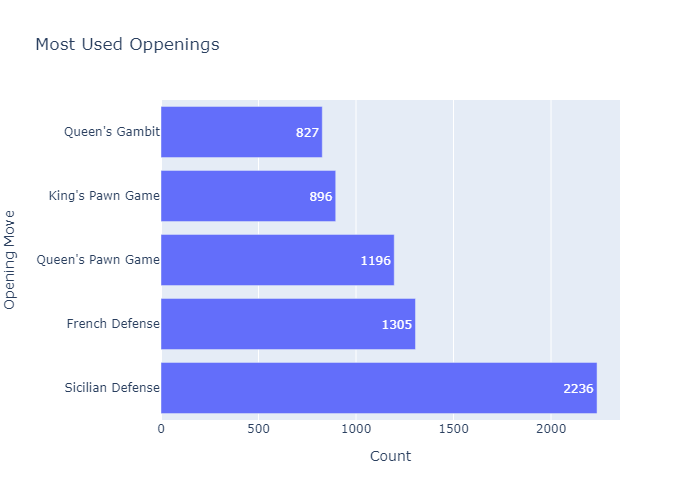

In [29]:
fig=px.bar(y=opening.index,x=opening.values,
           title="most used Oppenings".title(),
           labels={"x":"Count ","y":"Opening Move "},
           text=opening.values)
fig.show('png')

**Insight**

* Sicilian Defense is the most used opening move.

### 5. Opening move that most frquently used in games in which black won

In [30]:
dt['moves']

game_id
1        d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
2        d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
3        e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
4        d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
5        e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...
                               ...                        
20054    d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...
20055    d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...
20056    d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...
20057    e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...
20058    d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...
Name: moves, Length: 18581, dtype: object

In [31]:
dt['opening_move']=dt['moves'].str.slice(0,2)

In [32]:
black=dt[dt['winner']=='Black'].opening_move.value_counts().nlargest(5)
black

e4    5219
d4    1893
c4     285
Nf     280
e3     251
Name: opening_move, dtype: int64

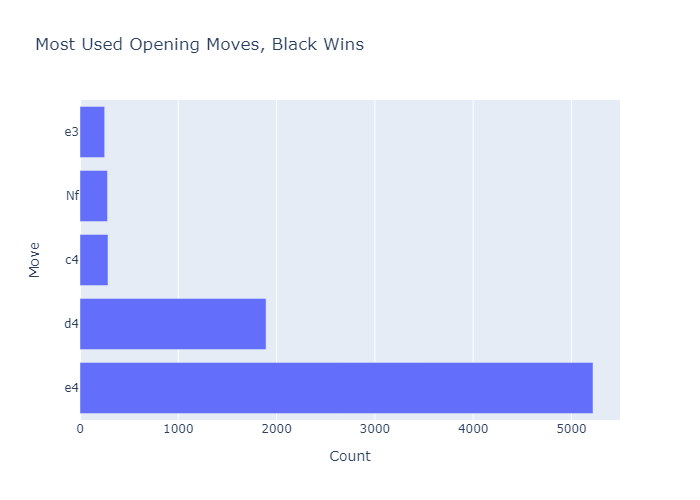

In [33]:
fig=px.bar(y=black.index,x=black.values,
          title='Most used opening moves, black wins'.title(),
          labels={'x':'Count','y':'Move'})
fig.show('png')

### 6.Opening move that most frequently used in games in which white won

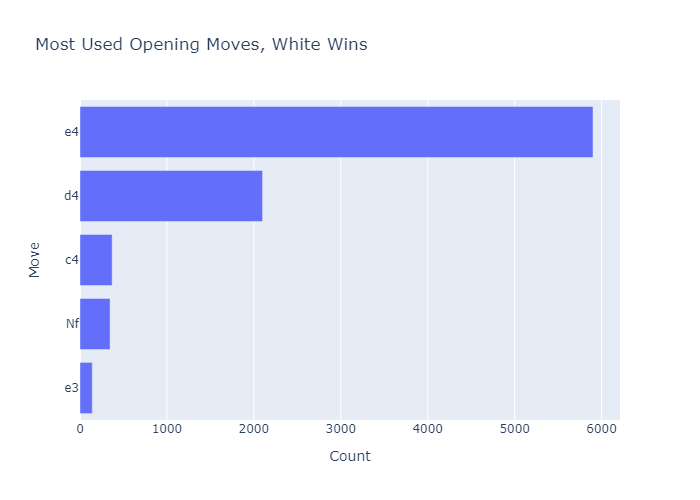

In [34]:
white=dt[dt["winner"]=="White"].opening_move.value_counts().nlargest(5)
fig=px.bar(y=white.index,x=white.values,
           title="most used opening moves, White wins".title(),
           labels={"x":"Count ","y":"Move "}).update_yaxes(categoryorder='total ascending')
fig.show('png')

**Insights:**

* e4 is the most used opening by the competitors 

### 7.User With Most Wins

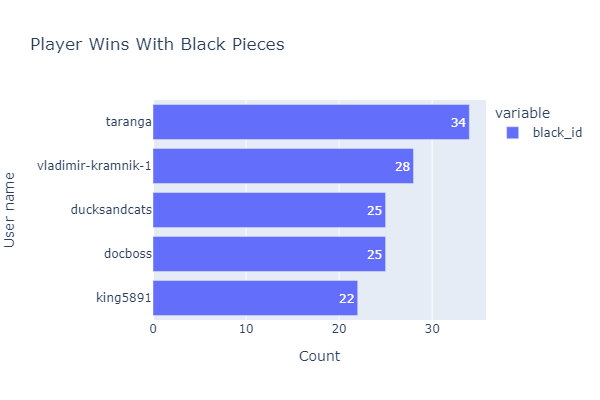

In [35]:
black_win_data = dt[dt['winner']=='Black']

fig=px.bar(black_win_data['black_id'].value_counts().head(),
       title='Player Wins With Black Pieces',
       orientation='h',
       width=600,height=400,labels={"value":"Count ","index":"User name"},text=black_win_data['black_id'].value_counts().head()
      ).update_yaxes(categoryorder='total ascending')
fig.show('png')

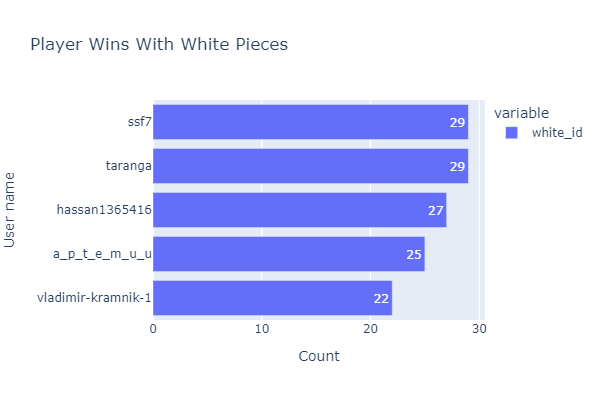

In [36]:
white_win_data = dt[dt['winner']=='White']

fig=px.bar(white_win_data['white_id'].value_counts().head(),
       title='Player Wins With White Pieces',
       orientation='h',
       width=600,height=400,labels={"value":"Count ","index":"User name"},text=white_win_data['white_id'].value_counts().head()
      ).update_yaxes(categoryorder='total ascending')
fig.show('png')

**Insights:**

* User id with taranga wins most of the games irrespective of white or black coins.

# Predicting the Online Chess winner with diffrent models

**Here we are taking the winner as target and others as features. We are having Classification problem to predict**

In [37]:
dt.columns

Index(['rated', 'turns', 'victory_status', 'winner', 'time_increment',
       'white_id', 'white_rating', 'black_id', 'black_rating', 'moves',
       'opening_code', 'opening_moves', 'opening_fullname',
       'opening_shortname', 'opening_variation', 'opening_move'],
      dtype='object')

#### Feature reduction

In [38]:
dt_p=dt.drop(['rated','victory_status', 'time_increment','white_id', 'black_id','moves','opening_fullname','opening_variation','opening_move'],axis=1)

In [39]:
dt_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18581 entries, 1 to 20058
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   turns              18581 non-null  int64 
 1   winner             18581 non-null  object
 2   white_rating       18581 non-null  int64 
 3   black_rating       18581 non-null  int64 
 4   opening_code       18581 non-null  object
 5   opening_moves      18581 non-null  int64 
 6   opening_shortname  18581 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


**Here we are having 6 features to predict the winner with 4 integer values and 2 objects**

### Label encoding of feature 'opening_shortname' & 'opening_code'

In [40]:
dt_p['opening_shortname'].nunique()

125

In [41]:
from sklearn.preprocessing import LabelEncoder
class_en = LabelEncoder()
dt_p['opening_shortname']=class_en.fit_transform(dt['opening_shortname'])
dt_p['opening_shortname'].unique()

array([107,  72,  60,  92,  81, 106,  11,  52, 102, 118,  38,  36,  48,
        33, 103,  88,  97,  50,  29, 124, 119,  69,  12,  91,  23,  90,
        44, 123, 100,  10,   8,  56,   0,  17,  42,  70,  13,   1,  78,
        49,  20,  34,  40,  80,  99,  82, 110,   9,  77, 105,  32,  55,
        61,  84,  85,  30,  95,  71,  58, 114,  24,  31,  62,  41, 115,
        26,  67,  18,  57, 113, 122,  15,  96,  37, 117,  83,  74,  53,
        94,  35,  39,  22,  73,  43,  68, 112,  76,   3,  86,  75,  59,
        51,  65,  93,  21,  66,   5, 111, 101,  28,  46,  47,  19,  64,
        45,  14, 109,  27,   2, 120,  54, 104,   7, 108,  79,  63,  89,
         4, 121, 116,  25,   6,  16,  87,  98])

In [42]:
dt_p['opening_code'].nunique()

265

In [43]:
dt_p['opening_code']=class_en.fit_transform(dt['opening_code'])
dt_p['opening_code'].unique()

array([194,  61, 128, 187, 149,  85, 185, 158,  62,   0, 114, 112, 164,
       162,  35,  79,  24,  80, 186, 153, 191, 104, 201,  67,  40, 109,
        82, 129,  54,  19,   4, 134, 152, 232,  36, 113,  10,  42, 121,
       221, 207, 214,  41, 208, 169, 132,  38,   8,  64,  87,  63,  74,
       108, 238, 233, 122, 136,  88,  50, 170, 102, 103, 229, 175,  72,
        81,  94,  89, 166,  71, 130, 173,  73, 180,  37, 150, 192,  90,
        21, 154,  68,   6, 165, 148,   7,   2,   3, 106, 188, 174,  29,
       142, 156, 155,  83, 172, 256, 161, 131,   5, 227,  44, 145,   9,
       111,   1,  92, 115, 141,  11,  55,  66, 105,  69, 138,  15,  97,
       118,  31, 193,  28,  13, 195, 218, 210, 202,  78, 181, 124,  47,
       264,  76, 200, 167, 228, 211, 239,  16,  95,  91, 215, 171, 182,
        46, 196, 235,  26,  20, 189, 190, 157,  93,  32, 198,  25,  99,
       244, 220, 107, 261, 133,  59, 258, 177, 135,  84,  75, 117,  27,
       209,  86, 100,  98,  48, 178,  65, 241, 206,  43, 249, 24

### Splitting of data

In [44]:
x=dt_p.drop(['winner'],axis=1)
y=pd.DataFrame(dt_p['winner'])

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [46]:
x_train.shape

(13006, 6)

In [47]:
x_test.shape

(5575, 6)

In [48]:
y_train.shape

(13006, 1)

In [49]:
y_test.shape

(5575, 1)

In [58]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

# to obtain optimum K value
# so we want to create model with varied k value

acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNN(n_neighbors=k,metric='minkowski') 
    classifier.fit(x_train,y_train) 
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred) 
    acc_values.append(acc) 

Text(0, 0.5, 'accuracy')

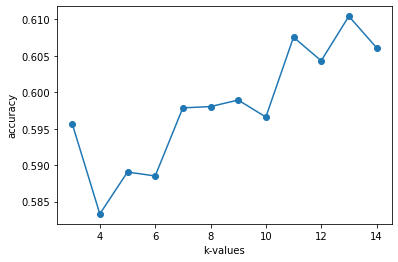

In [59]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-values')
plt.ylabel('accuracy')

## Modelling with Linear Regression, KNN , Decision Tree & SVM

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
SEED=42
lr=LogisticRegression(random_state=SEED)
knn=KNN(n_neighbors=13)
dtc=DecisionTreeClassifier(random_state=SEED)
svc = SVC(kernel='rbf')
classifiers=[('LogisticRegression',lr),('K Nearest Neighbors',knn),('Decision Tree',dtc),('SVM',svc)]
             

In [51]:
from sklearn.metrics import accuracy_score
for class_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('{:s}:{:.2f}'.format(class_name,accuracy))

LogisticRegression:0.63
K Nearest Neighbors:0.61
Decision Tree:0.58
SVM:0.63


## Modelling with Voting classifier, Random forest, Gradient Boosting & Extreme gradient boosting Model

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
SEED = 42
vc=VotingClassifier(estimators=classifiers)
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
classifiers=[('Voting Classifier',vc),('Random Forest',rf),('Gradient Boosting',gb),('Extreme Gradient Boosting',xgb)]

In [53]:
for class_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('{:s}:{:.2f}'.format(class_name,accuracy))

Voting Classifier:0.63
Random Forest:0.66
Gradient Boosting:0.72
[19:15:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Extreme Gradient Boosting:0.85


###  Model prediction Accuracy table

|Model|Accuracy_Score|
|---|:-:|
|Logistic Regression|0.63|
|kNN|0.61|
|Decision Tree|0.58|
|Radial SVM|0.63|
|Voting Classifier|0.63|
|Random Forest|0.66|
|Gradient Boosting|0.72|
|**Extreme Gradient Boosting**|**0.85**|

### Here the best fit for our data is Extreme Gradient Boosting model with 85% accuracy.

**As further step we can try tuning of hyperparameters and feature reduction in the model and check if the accuracy can be increased**

# Fine Tuning of the Model

### Checking feature importance in Extreme Gradient Model

In [54]:
pd.Series(xgb.feature_importances_,index=x.columns).sort_values(ascending=False)*100

turns                44.346325
white_rating         17.930864
black_rating         14.190485
opening_code          8.429999
opening_shortname     7.742883
opening_moves         7.359448
dtype: float32

**Here all the features are having importance so its not advisable to drop any of the features**

## Fine Tuning of hyper parameters in Extreme Gradient Boosting model

In [55]:
xgb.fit(x_train,y_train)

[19:15:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [56]:
xgbt=XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgbt.fit(x_train,y_train)

[19:15:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:15:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=27,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              subsample=0.8, tree_method='exact', validate_parameters=1, ...)

In [57]:
y_pred=xgbt.predict(x_test)
print('Accuracy score is',round(accuracy_score(y_test,y_pred),2))

Accuracy score is 0.86


**Thus by fine tuning the accuracy of the model is incerased by 1%.**

### Thus by fitting Extreme Gradient Boosting Classifier model we are able to predict the online Chess game winner by the given features with 86% accuracy